In [7]:
# Bayesian probabilistic linear model of atmospheric polution
# Prediction of Benzene concentration (C6H6)

import pymc3 as pm
import numpy as np
import os
import pandas as pd
import arviz as az

print(f"Running on PyMC3 v{pm.__version__}")
RANDOM_SEED = 58

Running on PyMC3 v3.8


In [8]:
# load data from CSV file
DATA_DIR = "C:\\Users\DELL\Documents\Fernando" 
planilha = os.path.join(DATA_DIR, "AirQuality3cal.csv") #calibration set

df = pd.read_csv(planilha, sep=";", decimal=",", header=0)

df.columns # Visualization of all columns from CSV file

Index(['Unnamed: 0', 'CO_GT', 'PT08_CO', 'NMHC_GT', 'PT08_NMHC', 'NOx_GT',
       'PT08_NOx', 'NO2_GT', 'PT08_NO2', 'O3', 'Temp', 'RH', 'AH', 'C6H6'],
      dtype='object')

In [9]:
#output calibration
dC6H6 = df['C6H6']
# define variables from set of calibration
df2= pd.DataFrame(df, columns=['CO_GT', 'PT08_CO', 'NMHC_GT', 'PT08_NMHC', 'NOx_GT', 'PT08_NOx', 'NO2_GT',
                               'PT08_NO2', 'O3', 'Temp', 'RH', 'AH'])
#validation/prediction set
planilha2 = os.path.join(DATA_DIR, "AirQuality3val.csv")

df3 = pd.read_csv(planilha2, sep=";", decimal=",", header=0)
# define the same variables from set of validation
df4= pd.DataFrame(df3, columns=['CO_GT', 'PT08_CO', 'NMHC_GT', 'PT08_NMHC', 'NOx_GT', 'PT08_NOx', 'NO2_GT',
                               'PT08_NO2', 'O3', 'Temp', 'RH', 'AH'])

In [10]:
#Probabilistic linear model building
with pm.Model() as model:
    a = pm.Normal('a', mu=dC6H6.mean(), sd=2)
    bA = pm.Normal('bA', mu=0, sd=2, shape=12) # shape = number of bA's
    sigma = pm.HalfCauchy('sigma', 2)   
    X = pm.Data('X', df2)
    mu = pm.Deterministic('mu', a + pm.math.dot(X, bA))
   
    Benz = pm.Normal('Benz', mu=mu, sd=sigma, observed=dC6H6)
    trace = pm.sample(1000, tune=2000, random_seed=RANDOM_SEED) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, bA, a]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 6000/6000 [00:37<00:00, 158.26draws/s]


C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C123A98100>,
      dtype=object)

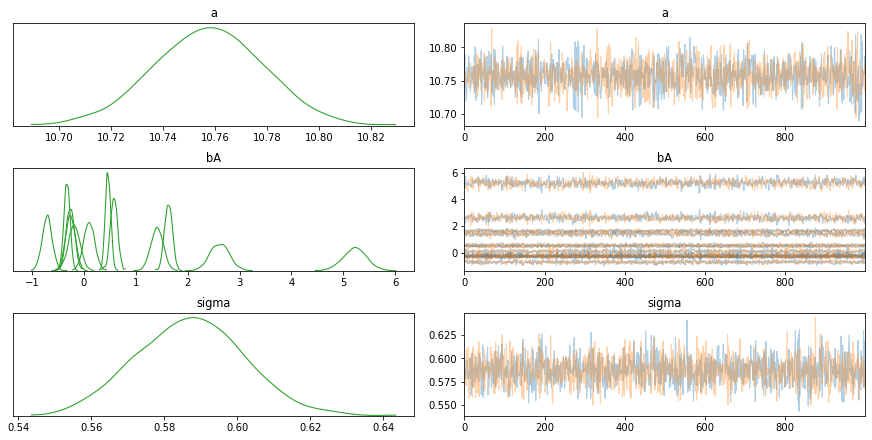

In [11]:
var_names = ['a', 'bA', 'sigma']
az.plot_trace(trace, var_names= var_names, compact = True, combined = True) #graphical Visualization of PDFs

In [12]:
pm.summary(trace, var_names) #Visualization of all parameters

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,10.757,0.021,10.718,10.798,0.000,0.000,1941.0,1941.0,1939.0,1251.0,1.0
bA[0],1.408,0.119,1.182,1.631,0.003,0.002,1624.0,1620.0,1628.0,1417.0,1.0
bA[1],-0.710,0.095,-0.892,-0.534,0.002,0.002,1580.0,1547.0,1579.0,1494.0,1.0
bA[2],0.465,0.051,0.367,0.557,0.001,0.001,1732.0,1707.0,1739.0,1589.0,1.0
bA[3],5.219,0.228,4.795,5.665,0.007,0.005,1213.0,1213.0,1211.0,1298.0,1.0
bA[4],-0.262,0.080,-0.410,-0.113,0.002,0.001,1909.0,1830.0,1909.0,1518.0,1.0
bA[5],1.629,0.074,1.487,1.759,0.002,0.001,1413.0,1413.0,1414.0,1694.0,1.0
bA[6],-0.326,0.057,-0.428,-0.214,0.001,0.001,1659.0,1659.0,1661.0,1498.0,1.0
bA[7],2.613,0.185,2.285,2.983,0.005,0.004,1283.0,1272.0,1278.0,1158.0,1.0
bA[8],0.578,0.070,0.452,0.711,0.002,0.001,1570.0,1521.0,1556.0,1251.0,1.0


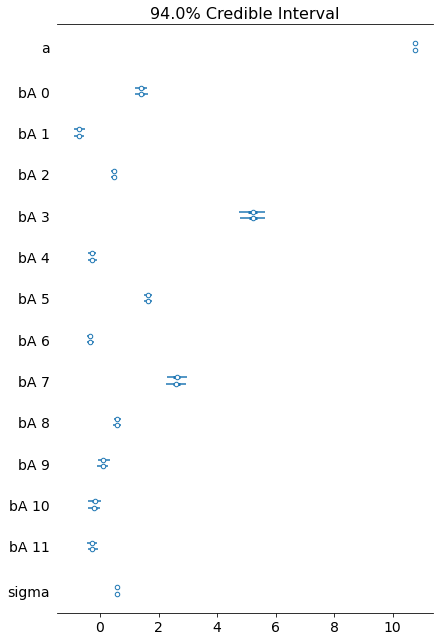

In [13]:
pm.forestplot(trace, var_names=var_names); # graphical visualization of parameters

In [14]:
# Estimated calibration values
C6H6_cal = pm.sample_posterior_predictive(trace, samples=2000, model=model)['Benz']

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 581.96it/s]


In [15]:
# Save the C6H6_cal results as text file
np.savetxt('C6H6_cal.txt', C6H6_cal.mean(0), delimiter=' ', newline='\n')

In [16]:
# Estimated prediction values
with model:
     pm.set_data({'X': pd.DataFrame(df4, index=np.arange(0, 50, 1))})#definition of the index of the predicition samples
     C6H6_test = pm.sample_posterior_predictive(trace, model=model, random_seed=RANDOM_SEED)['Benz']     

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:04<00:00, 406.81it/s]


In [17]:
# Save the C6H6_test results as text file
np.savetxt('C6H6_test.txt', C6H6_test.mean(axis=0), delimiter=' ', newline='\n')